In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
covid = pd.read_csv('/content/drive/MyDrive/Ciência de dados /country_wise_latest.csv')

In [ ]:
covid.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [ ]:
covid.shape


(187, 15)

In [4]:
covid.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [ ]:
covid.columns


Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

analisando o número de casos por região e vendo quais regiões têm mais casos confirmando

In [5]:
covid.groupby('WHO Region')['Confirmed'].sum().sort_values(ascending = False)

WHO Region
Americas                 8839286
Europe                   3299523
South-East Asia          1835297
Eastern Mediterranean    1490744
Africa                    723207
Western Pacific           292428
Name: Confirmed, dtype: int64

plotando o gráfico para visualizar

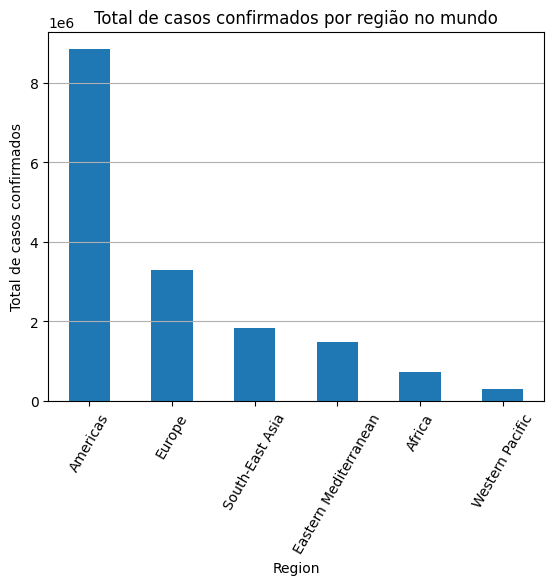

In [ ]:
covid.groupby('WHO Region')['Confirmed'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Total de casos confirmados por região no mundo')
plt.xlabel('Region')
plt.ylabel('Total de casos confirmados')
plt.xticks(rotation = 60)
plt.grid(axis = 'y')

fazendo o mesmo para cada pais de cada região

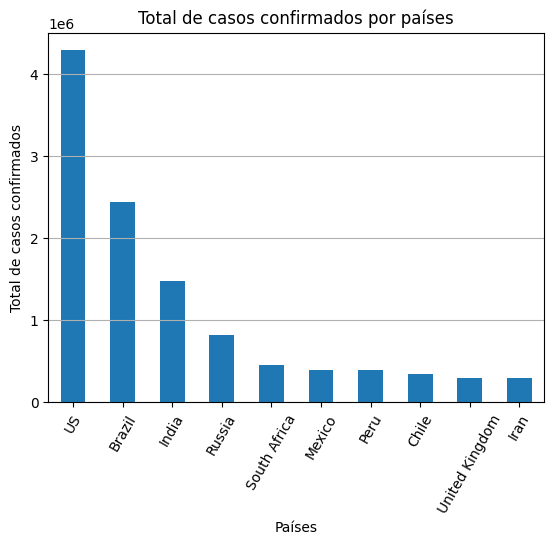

In [ ]:
covid.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title('Total de casos confirmados por países')
plt.xlabel('Países')
plt.ylabel('Total de casos confirmados')
plt.xticks(rotation = 60)
plt.grid(axis = 'y')


           Confirmed    Deaths  Recovered    Active
Confirmed   1.000000  0.934698   0.906377  0.927018
Deaths      0.934698  1.000000   0.832098  0.871586
Recovered   0.906377  0.832098   1.000000  0.682103
Active      0.927018  0.871586   0.682103  1.000000


([<matplotlib.axis.YTick at 0x7e3837ef5810>,
 [Text(0, 0, 'Confirmed'),
  Text(0, 1, 'Deaths'),
  Text(0, 2, 'Recovered'),
  Text(0, 3, 'Active')])

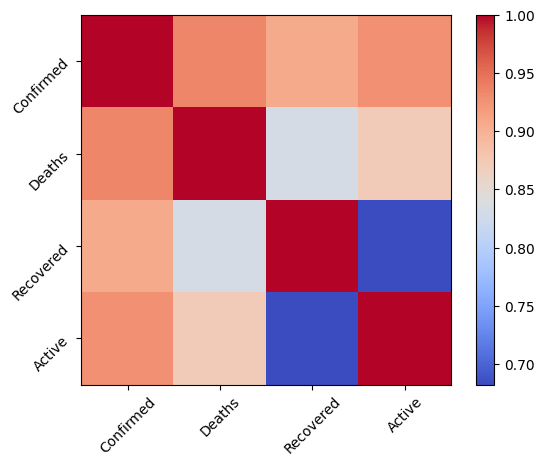

In [ ]:
correlacao = covid[['Confirmed','Deaths', 'Recovered', 'Active']].corr()
print(correlacao)
plt.imshow(correlacao,cmap = 'coolwarm', interpolation = 'nearest')
plt.colorbar()
plt.xticks(range(len(correlacao.columns)), correlacao.columns, rotation = 45)
plt.yticks(range(len(correlacao.columns)), correlacao.columns, rotation = 45)


In [ ]:
covid['Fatality_rate'] = covid['Deaths']/covid['Confirmed']*100
covid['Recovery_rate'] = covid['Recovered']/covid['Confirmed']*100
covid.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Fatality_rate,Recovery_rate
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,3.499435,69.486805
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,2.950820,56.250000
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,4.157581,67.339935
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,5.733186,88.533627
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,4.315789,25.473684


<Axes: xlabel='Fatality_rate', ylabel='Recovery_rate'>

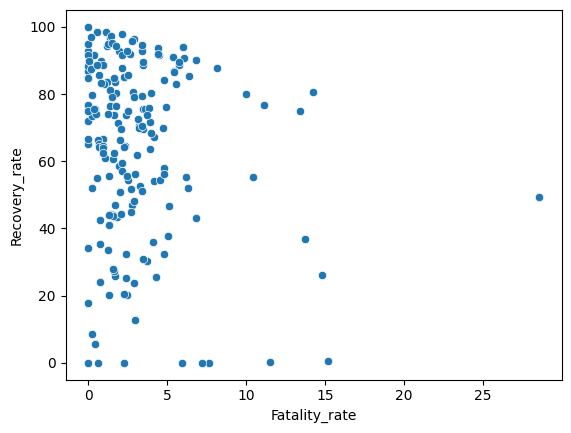

In [ ]:
sns.scatterplot(x='Fatality_rate', y = 'Recovery_rate', data = covid)

(array([], dtype=float64), [])

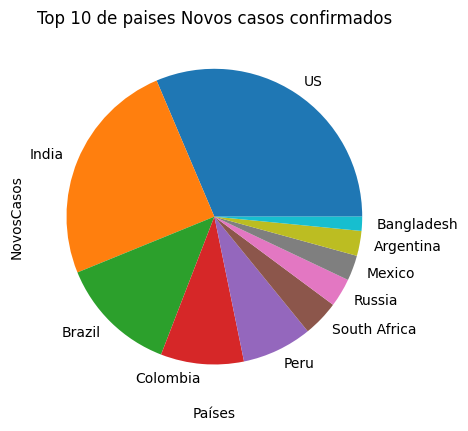

In [ ]:
covid.groupby('Country/Region')['New cases'].sum().sort_values(ascending = False).head(10).plot(kind = 'pie')
plt.title( 'Top 10 de paises Novos casos confirmados')
plt.xlabel('Países')
plt.ylabel('NovosCasos')
plt.xticks(rotation = 60)



<Axes: xlabel='Country/Region'>

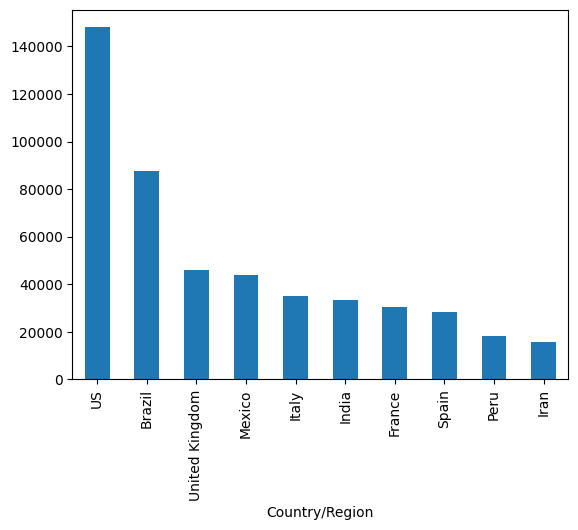

In [ ]:
covid.groupby('Country/Region')['Deaths'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')

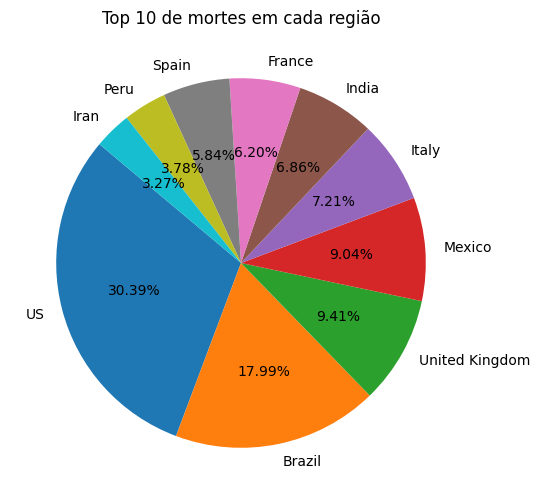

In [9]:
plt.figure(figsize = (10, 6 ))
covid1 = covid.groupby('Country/Region')['Deaths'].sum().sort_values(ascending = False).head(10)
plt.title('Top 10 de mortes em cada região')

plt_chart = plt.pie(covid1, labels = covid1.index,autopct = '%0.2f%%', startangle = 140 )

In [10]:
px.scatter(covid, x='Confirmed', y = 'Deaths', color= 'WHO Region')

In [ ]:
#criaando um algoritmo de regressão oara vê a correlação
x = covid[['Deaths', 'Recovered', 'Active']]
y = covid['Confirmed']